In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.datacollection import DataCollector
import pandas as pd
import random

In [3]:
df_infl = pd.read_csv("inflationp2.csv")
INFLATON = [inflation / 12 for inflation in df_infl["inflation"] for _ in range(12)]
INFLATON

[0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.177509167,
 0.177509167,


In [4]:
#data from https://fred.stlouisfed.org/series/REAINTRATREARAT10Y#0
#the data is the interest rate per month for all 120 months starting from 2013 till the end of 2023

df = pd.read_csv('data_interest_rate.csv')
df2 = df.drop([df.index[120]])
df3 = df2["interest_rate"]

df_inflation = pd.read_csv('inflation_data_real.csv')
df_inflation = df_inflation['Value2']

#global variables

HOUSE_SIZES = ["XS", "S", "M", "L", "XL"]
# location miss veranderen voor staten en evt met dict en kans/ verhouding inwoners erbij -> geen idee hoe.
LOCATIONS_earlier = ["N", "E", "S", "W"]

INTEREST_RATE = list(df3)
#INFLATON = list(df_inflation)

#other option:
LOCATIONS = ["Urban", "Suburban", "Rural"]

# scratch
# for location the following can maybe be used (comes from https://gist.github.com/JeffPaine/3083347):
west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
southwest = ["AZ", "NM", "TX", "OK"]
southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
northeast = ["CT", "DC", "HI", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
hawai_group = ["HI"]
alaska_group =["AK"]
USA_LOCATIONS = [southeast, west, midwest, southwest, northeast, hawai_group, alaska_group]
USA_LOCATION_GENERATE = southeast + west + midwest + southwest + northeast + hawai_group + alaska_group

In [5]:
#Global variables
INTEREST_RATE = list(df3)

#controle data
df_controle = pd.read_csv("AVG_house_price.csv")
df_controle.rename(columns={'observation_date': 'date',
                             'ASPUS': 'Mean Sales Price'}, inplace=True)
CONTROLE = df_controle["Mean Sales Price"]

#Location data
#probabilities are based on data from https://worldpopulationreview.com/states
west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT"]
west_prob = [11.57 / 100, 1.26 / 100, 2.33 / 100, 0.96 / 100, 0.59 / 100, 1.03 / 100, 1.76 / 100, 0.17 / 100, 0.34 / 100]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
midwest_prob = [0.23 / 100, 0.28 / 100, 0.59 / 100, 0.88 / 100, 1.72 / 100, 0.96 / 100, 1.85 / 100, 1.77 / 100, 3.73 / 100, 2.05 / 100, 2.99 / 100, 3.52 / 100]
southwest = ["AZ", "NM", "TX", "OK"]
southwest_prob = [2.23 / 100, 0.63 / 100, 9.22 / 100, 1.22 / 100]
southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
southeast_prob = [0.92 / 100, 1.36 / 100, 0.88 / 100, 2.14 / 100, 1.53 / 100, 1.35 / 100, 3.32 / 100, 0.53 / 100, 2.61 / 100, 3.27 / 100, 1.63 / 100, 6.83 / 100, 1.83 / 100, 0.31 / 100]
northeast = ["CT", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
northeast_prob = [1.08 / 100, 0.42 / 100, 2.09 / 100, 0.42 / 100, 2.78 / 100, 5.8 / 100, 3.86 / 100, 0.33 / 100, 0.19 / 100]
hawai_group = ["HI"]
hawai_group_prob = [0.42 / 100]
alaska_group =["AK"]
alaska_group_prob = [0.22 / 100]

#Global variables for location
USA_LOCATIONS = [southeast, west, midwest, southwest, northeast, hawai_group, alaska_group]
USA_LOCATION_GENERATE = southeast + west + midwest + southwest + northeast + hawai_group + alaska_group #locations for generating
USA_LOCATIONS_PROB = southeast_prob + west_prob + midwest_prob + southwest_prob + northeast_prob + hawai_group_prob + alaska_group_prob

In [7]:
# based on information from https://www.home-cost.com/cost-per-sf-by-state/
AVERAGE_COST_PER_SF = {
    'AL': 115, 'AK': 225, 'AZ': 155,
    'AR': 120, 'CA': 300, 'CO': 200,
    'CT': 215, 'DE': 145, 'FL': 155,
    'GA': 140, 'HI': 450, 'ID': 150,
    'IL': 160, 'IN': 130, 'IA': 130,
    'KS': 130, 'KY': 120, 'LA': 120,
    'ME': 200, 'MD': 160, 'MA': 275,
    'MI': 140, 'MN': 200, 'MS': 115,
    'MO': 130, 'MT': 200, 'NE': 130,
    'NV': 190, 'NH': 200, 'NJ': 240,
    'NM': 140, 'NY': 275, 'NC': 140,
    'ND': 130, 'OH': 130, 'OK': 115,
    'OR': 200, 'PA': 160, 'RI': 215,
    'SC': 140, 'SD': 130, 'TN': 155,
    'TX': 150, 'UT': 155, 'VT': 200,
    'VA': 160, 'WA': 200, 'WV': 120,
    'WI': 160, 'WY': 200
}

REGION_DICT = {}
for region_states in USA_LOCATIONS:
    for state in region_states:
        REGION_DICT[state] = region_states

In [11]:
def location_pref(location_person, location_building):
    """Gives 1 back if location is the same, 2 if location is nearby and 3 if none of the two before"""
    temp_var = None
    if location_person == location_building:
        return 1
    else:
        for i in range(len(USA_LOCATIONS)):
            if location_person in USA_LOCATIONS[i]:
                temp_var = i
                break
    if temp_var != None and location_building in USA_LOCATIONS[temp_var]:
        return 2
    return 3

def set_age():
    age_group = np.random.choice(['18-24','25-64','65+'], p=[0.13, 0.69, 0.18])
    if age_group == '18-24':
        return np.random.randint(18, 24)
    elif age_group == '25-64':
        return np.random.randint(25, 64)
    else:
        return np.random.randint(65, 80)

Model

In [161]:
class BuyerAgent(Agent):
    def __init__(self, model, mortage_from_calc, age):
        super().__init__(model)

        # assumption people are willing to pay between 30 and 50 % of salary. 
        
        #Us avarage of percentage to mortage in US is around the 25 % according to:
        # https://usafacts.org/data-projects/housing-costs
        mean_percentage = 0.30
        std_percentage = 0.05
        willing_to_pay = np.clip(np.random.normal(mean_percentage, std_percentage), 0.1, 0.6)

        age_group = random.choices(['18-24','25-64','65+'], weights=[0.13, 0.69, 0.18], k=1)[0]
        edu_group = random.choices(['hs', 'ass', 'bac'], weights=[45, 17, 38], k=1)[0]
        if age_group == '18-24':
                age = random.randint(18, 24)
        elif age_group == '25-64':
                age = random.randint(25, 64)
        else:
                age = random.randint(65, 80)

        # pension calculation found at https://equable.org/pension-basics-how-pension-benefits-are-calculated/
        # average age for a degree found at https://learn.org/articles/normal_age_finish_college.html
        if age_group != '65+':
                if edu_group == 'hs':
                    mean_salary = 42100 * model.inflation / 12
                elif edu_group == 'ass':
                    mean_salary = 50600 * model.inflation / 12
                else:
                    mean_salary = 68500 * model.inflation / 12
        else:
                if edu_group == 'hs':
                    mean_salary = (random.randint(59, 65) - random.randint(17, 18)) * 0.02 * 42100 / 12 * model.inflation
                elif edu_group == 'ass':
                    mean_salary = (random.randint(59, 65) - random.randint(23, 29)) * 0.02 * 50600 / 12 * model.inflation
                else:
                    mean_salary = (random.randint(59, 65) - random.randint(23, 29)) * 0.02 * 68500 / 12 * model.inflation
        std_dev_salary = 1000 #maybe add inflation and growth here too
        #np.clip only gives numbers between the two given numbers, in this case 1000 and 20000
        salary = np.clip(np.random.normal(mean_salary, std_dev_salary), 1000.0, 20000.0)

        
        # M = P * (r * (1 + r)^360) / ((1 + r)^360 - 1) based on https://www.bankrate.com/mortgages/mortgage-calculator/#calculate-mortgage-payment
        # P is principal loan amount, M is monthly payment (here max monthly payment) and r = interest rate monthly
        # Omgerekend = P = M / (r * (1 + r)^360) / ((1 + r)^360 - 1) -> this is already calculated before it comes here.
        M = salary * willing_to_pay
        self.budget = (M * mortage_from_calc)

        #self.preference_size = np.random.choice(HOUSE_SIZES)
        self.preference_location = np.random.choice(USA_LOCATION_GENERATE)

        #variables to keep track of information
        self.months = 0
        self.age = age
        self.death_rate = self.calc_death(age)
        prob_not_bought_before = min(1, self.age / 40)
        self.bought_before = np.random.choice([True, False], p = [prob_not_bought_before, 1 - prob_not_bought_before])

    def calc_death(self, age):
        # # death rates by age data found at: https://www.cdc.gov/nchs/products/databriefs/db492.htm
        if 18 < age < 24:
            return 80/100000
        elif 24 <= age < 34:
            return 163.4/100000
        elif 34 <= age < 44:
            return 255.4/100000
        elif 44 <= age < 54:
            return 453.3/100000
        elif 54 <= age < 64:
            return 992.1/100000
        elif 64 <= age < 74:
            return 1978.7/100000
        elif 74 <= age < 84:
            return 4708.2/100000
        else:
            return 14389.6/100000

    def location_check(self, location_building):
        check_var = location_pref(self.preference_location, location_building)
        if self.bought_before == False:
            if check_var in [1, 2]:
                return True
            else:
                return False
        else:
            if check_var == 1:
                return True
            else:
                return False
    
    def buy_house(self, model):
        """Function that buys a house"""
        chosen_seller = None
        sellers = model.Seller_Agents #[seller for seller in model.Seller_Agents if not seller.house_sold]
        affordable_sellers = [seller for seller in sellers if seller.cost <= self.budget]
        if not affordable_sellers:
            return
        
        # a house is for sure sold if the location and preference and size and preference are the same. Als the budget doesn't differ more than 100000
        #pref_size = self.preference_size
        buy_budget = self.budget
        perfect_combos = [seller for seller in affordable_sellers if self.location_check(seller.location) and abs(seller.cost - buy_budget) <= 10000]
        if perfect_combos:
            chosen_seller = np.random.choice(perfect_combos)   
#         else:
#             alright_combos = [seller for seller in affordable_sellers if abs(LOCATIONS.index(seller.location) - LOCATIONS.index(self.preference_location)) <= 1 and 
#                                 abs(HOUSE_SIZES.index(seller.house_size) - HOUSE_SIZES.index(self.preference_size)) <= 1 and abs(seller.cost - self.budget) <= 10000.0]

#             if alright_combos and np.random.rand() < 0.334:
#                 #only 50 % chance on buying
#                 chosen_seller = np.random.choice(alright_combos)

            #small change a buyer buys something not well fit
        else:
            if affordable_sellers and np.random.rand() > 0.01:
                chosen_seller = np.random.choice(affordable_sellers)
                
        if chosen_seller:
            model.sales_this_month.append(chosen_seller.cost)
            model.existing_houses.append(chosen_seller)
            chosen_seller.months = 0
            model.Seller_Agents.remove(chosen_seller)
            model.Buyer_Agents.remove(self)
            if self in model.Buyer_Agents:
                print("Something went wrong") 

class SellerAgent(Agent):
    def __init__(self, model):
        super().__init__(model)
        #self.cost = np.clip((np.random.normal(mean_cost, std_cost)), 100000, 2000000)
        self.location = np.random.choice(USA_LOCATION_GENERATE)
        self.size = np.clip(np.random.normal(2000, 400), 500, 10000)
        self.cost = AVERAGE_COST_PER_SF[self.location] * self.size * model.inflation * (1 + model.historice_growth_month) ** model.month

        self.orig_cost = self.cost
        #self.house_size = np.random.choice(HOUSE_SIZES)
        self.location = np.random.choice(USA_LOCATION_GENERATE)
        self.months = 0

    def change_cost(self, model, demand_supply_ratio, growth_multiplier, base_growth):
          # Base monthly growth
        if demand_supply_ratio > 1:
            self.cost *= (1 + base_growth * growth_multiplier)
        
        # Adjust downward if unsold for too long
        if self.months > 1 and self.cost > self.orig_cost * 0.6:
            self.cost *= 0.95

class House_Model(Model):
    def __init__(self, number_of_buyers, number_of_sellers, interest_rate, seed=None):
        super().__init__(seed=seed)
        self.interest_rate = interest_rate
        self.historice_growth_month = 0.035 / 12 #maybe use historic data/ real data
        self.inflation = 1
        self.num_sold = 0
        self.month = 1
        #self.Buyer_Agents = [BuyerAgent(self, self.interest_rate, self.inflation, True, mean_salary) for _ in range(self.num_buyers)]
        self.Buyer_Agents = []
        #creation of houses already in posession
        mean_cost = 320000
        std_cost = mean_cost / 3
        self.existing_houses = [SellerAgent(self) for _ in range(number_of_sellers)]
        self.Seller_Agents = []

        # Data collector
        self.total_sales = []
        self.Mean_Sale_Prices = []
        self.Unsold_houses = []
        self.Number_of_buyers = []
        self.Number_of_houses_sold = []
        self.sales_this_month = []
        # for buyer in self.Buyer_Agents:
        #     buyer.buy_house(self)

    def step(self, interest_rate_step, inflation, p_new_buyers, base_growth):
        self.sales_this_month = []
        self.interest_rate = interest_rate_step
        self.inflation *= (1 + inflation / 100)
        self.use_inflation(inflation)
        self.add_agents_per_step(p_new_buyers)
        self.bought_to_sell()
        
        np.random.shuffle(self.Buyer_Agents)
        for buyer in self.Buyer_Agents:
            buyer.buy_house(self)

        demand_supply_ratio = len(self.Buyer_Agents) / max(1, len(self.Seller_Agents))
        growth_multiplier = min(1, demand_supply_ratio)
        np.random.shuffle(self.Seller_Agents)
        for seller in self.Seller_Agents:
            seller.change_cost(self, demand_supply_ratio, growth_multiplier, base_growth)
        self.collect_data()
        self.month += 1
        self.total_sales = self.total_sales + self.sales_this_month

        # print(f"Turn {self.month}: Buyers={len(self.Buyer_Agents)}, Sellers={len(self.Seller_Agents)}, Demand/Supply={len(self.Buyer_Agents) / max(1, len(self.Seller_Agents))}")
        # print(f"Inflation Factor: {(1 + inflation) * (1 + self.historice_growth_month)}, total inflation = {self.inflation}")
        # print(f"Average Buyer Budget: {np.mean([buyer.budget for buyer in self.Buyer_Agents])}")
        # print(f"Mean Sale Price: {self.Mean_Sale_Prices[-1] if self.Mean_Sale_Prices else 0}")


    def collect_data(self):
        self.Mean_Sale_Prices.append(self.compute_mean_house_price())
        if self.Mean_Sale_Prices[-1] == 0 and len(self.Mean_Sale_Prices) > 1:
            self.Mean_Sale_Prices[-1] = self.Mean_Sale_Prices[-2]
        self.Unsold_houses.append(self.compute_unsold_inventory())
        self.Number_of_buyers.append(self.compute_num_house_buyers())
        self.Number_of_houses_sold.append(self.compute_num_sold())
    
    def return_total_sales(self):
        return self.total_sales
    
    def compute_mean_house_price(self):
        if len(self.sales_this_month) > 0:
            return np.mean(self.sales_this_month)  
        else:
            return 0

    def compute_unsold_inventory(self):
        return len(self.Seller_Agents)

    def compute_num_house_buyers(self):
        return len(self.Buyer_Agents)
    
    def compute_num_sold(self):
        return len(self.sales_this_month)
    
    def use_inflation(self, inp_inflation):
        inflation_factor = (1 + inp_inflation / 100) * (1 + self.historice_growth_month)
        buyer_budget = np.array([buyer.budget for buyer in self.Buyer_Agents])
        buyer_budget *= inflation_factor
        for buyer, budget in zip(self.Buyer_Agents, buyer_budget):
            buyer.budget = budget
            buyer.months += 1

            buyer.age += 1/12
            buyer.death_rate = buyer.calc_death(buyer.age)
            
            if random.random() < buyer.death_rate:
                #print(f"Buyer of age {buyer.age} has died! {buyer.death_rate}")
                self.Buyer_Agents.remove(buyer)

        seller_costs = np.array([seller.cost for seller in self.Seller_Agents])
        seller_costs *= inflation_factor
        for seller, cost in zip(self.Seller_Agents, seller_costs):
            seller.cost = cost
            seller.months += 1

        existing_costs = np.array([house.cost for house in self.existing_houses])
        existing_costs *= inflation_factor
        for house, cost in zip(self.existing_houses, existing_costs):
            house.cost = cost
            

    def add_agents_per_step(self, p_new_buyers):
        #the past 10 years the searching buyers were more than the number of sellers -> SOURCE!!
        num_extra_buyers = int(p_new_buyers * len(self.existing_houses) / 12 + 0.5) #assumption  # baseren op groei bevolking
        #during the corona period the supply of new houses went down.
 
        # median us salary is 51940,16 US dollar https://www.multpl.com/us-median-income/table/by-year
        # per month is that 4328,34
        #mean_salary = (4328 * (1 + self.inflation / 100)) * (1 + self.historice_growth_month) ** self.month
        monthly_interest_rate = self.interest_rate / 100 / 12
        #assumption paying mortage in 30 years. 30 * 12 = 360 payments
        payments = 360
        mortage_calc = ((1 + monthly_interest_rate)**payments - 1) / (monthly_interest_rate * (1 + monthly_interest_rate)**payments)
        new_Buyer_Agents = [BuyerAgent(self, mortage_calc, set_age()) for _ in range(num_extra_buyers)]
        self.Buyer_Agents = self.Buyer_Agents + new_Buyer_Agents
        #num_extra_sellers moet nog ergens op gebaseert worden-> gedachte nu: hogere interest rates = duurder lenen = minder huizen gebouwd.
        #Daardoor nu een staandaard/ base rate gepakt en vervolgens op basis van interest rate er iets van af halen of bij optellen 
        
        #mean_cost = 320000 * (1 + self.inflation / 100) * (1 + self.historice_growth_month) ** self.month
        num_extra_sellers = int(0.0114 * len(self.existing_houses) / 12 + 0.5)
        if self.month >= 98 and self.month <= 121:
            num_extra_sellers = int(num_extra_sellers * 0.6)
        new_Seller_Agents =  [SellerAgent(self) for _ in range(num_extra_sellers)]
        self.Seller_Agents = self.Seller_Agents + new_Seller_Agents

    def bought_to_sell(self):
        """Function makes people that once bought a house a seller
        
        HIER MOET NOG DATA VOOR GEVONDEN WORDEN!
            -> Met deze functie kan add_agents_per_step worden veranderd in alleen nieuwe huizen die op de markt komen.

            OOK MOET ER VOOR HET MODEL START AL AGENTS AANGEMAAKT WORDEN DIE AL EEN HUIS HEBBEN.
            WELLICHT OOK PER VERKOOP EXTRA KOPER?

        https://www.census.gov/construction/nrc/pdf/newresconst.pdf and https://ceramicworldweb.com/en/economics-and-markets/another-difficult-year-us-housing-market#:~:text=In%202023%20the%20U.S.%20residential,also%20for%20the%20year%202024. 
        -> aproxamaly 1.4 mil new houses
        122.4 mil households in 2013
        so approx 4 mil houses are resold each year (based on house_sold_2014-2023 png)
        4 / 122.4 =  3,3 % resold
        1.4 / 122.4 = 1.14 % new built each year of original houses there are
        """
        procent_of_people_selling = 0.033 / 12
        num_new_seller = int(procent_of_people_selling * len(self.existing_houses) + 0.5)
        num_new_buyers = num_new_seller
        if self.month >= 98 and self.month <= 121:
            num_new_seller = int(num_new_seller * 0.6)
        for _ in range(num_new_seller):
            new_seller = np.random.choice(self.existing_houses)
            self.Seller_Agents.append(new_seller)
            self.existing_houses.remove(new_seller)
        
        #mean_salary = 4328 * (1 + self.inflation / 100) * (1 + self.historice_growth_month) ** self.month
        interest_rate_monthly = self.interest_rate / 100 / 12
        payments = 360
        mortage_calc = ((1 + interest_rate_monthly)**payments - 1) / (interest_rate_monthly * (1 + interest_rate_monthly)**payments)
        new_Buyer_Agents = [BuyerAgent(self, mortage_calc, set_age()) for _ in range(num_new_buyers)]
        self.Buyer_Agents = self.Buyer_Agents + new_Buyer_Agents

Simulate model with real data input

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


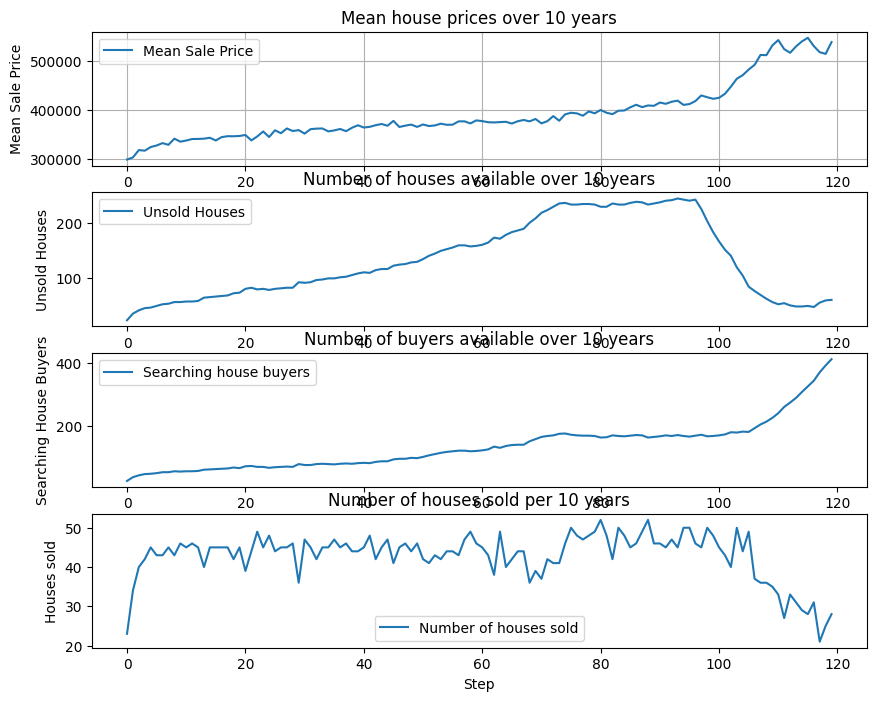

In [131]:
result_list = []
for _ in range(20):
    model = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE[0])
    for i in range(10*12):
        print(i)
        model.step(interest_rate_step = INTEREST_RATE[i], inflation = INFLATON[i], p_new_buyers = 0.0116, base_growth = 0.011)

    results = [model.Mean_Sale_Prices, model.Unsold_houses, model.Number_of_buyers, model.Number_of_houses_sold]
    result_list.append(model.Mean_Sale_Prices)

mean_prices_list = np.mean(result_list, axis = 0)
plt.figure(figsize = (10, 8))

plt.subplot(411)
plt.plot(mean_prices_list, label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.legend()

plt.subplot(412)
plt.title("Number of houses available over 10 years")
plt.plot(results[1], label = 'Unsold Houses')
plt.xlabel('Step')
plt.ylabel('Unsold Houses')
plt.legend()

plt.subplot(413)
plt.title("Number of buyers available over 10 years")
plt.plot(results[2], label = 'Searching house buyers')
plt.xlabel('Step')
plt.ylabel('Searching House Buyers')
plt.legend()

plt.subplot(414)
plt.title("Number of houses sold per 10 years")
plt.plot(results[3], label = 'Number of houses sold')
plt.xlabel('Step')
plt.ylabel('Houses sold')
plt.legend()

plt.show()

Compare simulation with the real data

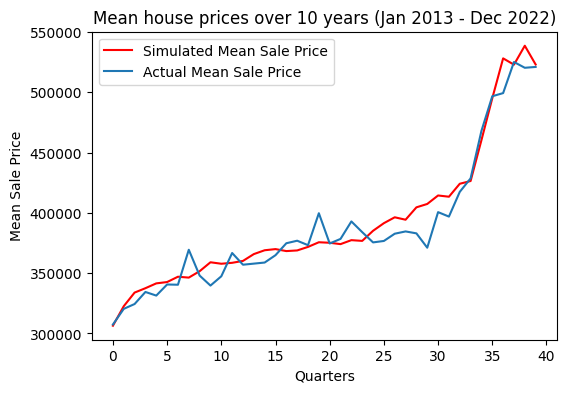

In [158]:
plt.figure(figsize = (6, 4))

controle = pd.read_csv("AVG_house_price.csv")
controle2 = list(controle["ASPUS"][:40])

def results_to_per_quarter(results):
    ds_results = []
    sum_var = 0
    for i in range(len(results)):
        sum_var += results[i]
        if (i + 1) % 3 == 0:
            ds_results.append(sum_var / 3)
            sum_var = 0
    return ds_results

result_per_qt = results_to_per_quarter(list(mean_prices_list))
plt.plot(result_per_qt, label = 'Simulated Mean Sale Price', color = "red")
plt.plot(controle2, label = 'Actual Mean Sale Price')
plt.title("Mean house prices over 10 years (Jan 2013 - Dec 2022)")
plt.xlabel('Quarters')
plt.ylabel('Mean Sale Price')
plt.legend()
plt.show()
plt.close()

In [133]:
print(diff_calc(result_per_qt, controle2[:40]))

398676.9175496152


In [89]:
# This code was first runned with: input_opt_new_buyers = [0.0114, 0.0117 ,0.0120, 0.0123, 0.0126] and input_options_base_growth = [0.01, 0.02, 0.03, 0.04, 0.05]
# The result was: [0.0114, 0.01]
# Then it was runned with: input_opt_new_buyers = [0.0114, 0.0115 ,0.0116, 0.0117, 0.0118] and input_options_base_growth = [0.005, 0.008, 0.012, 0.016, 0.02]
# The result was: [0.0116, 0.012]
# Then input_opt_new_buyers was set at 0.0116 and input_options_base_growth = [0.1, 0.11, 0.12, 0.13, 0.14]. Result was 0.11

def run_model(p_new_buyers, base_growth):
    result_list = []
    for _ in range(5):
        model = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE[0])
        for i in range(10*12):
            #print(i)
            model.step(interest_rate_step = INTEREST_RATE[i], inflation = INFLATON[i], p_new_buyers = p_new_buyers, base_growth = base_growth)

        #results = [model.Mean_Sale_Prices, model.Unsold_houses, model.Number_of_buyers, model.Number_of_houses_sold]
        result_list.append(model.Mean_Sale_Prices)
    return np.mean(result_list, axis = 0)

def diff_calc(results_sim: list, control_data: list):
    if len(results_sim) != len(control_data):
        print("Wrong input")
        return
    sum_dif = 0
    for i in range(len(results_sim)):
        sum_dif += abs(results_sim[i] - control_data[i])
    return sum_dif

lowest_diff = -1
input_opt_new_buyers = [0.0114, 0.0115 ,0.0116, 0.0117, 0.0118]
input_options_base_growth = [0.1, 0.11, 0.12, 0.13, 0.14]
best_result = [-1, -1]
best_inp_new_buy = -1
for i in range(5):
    temp_input_base_growth = 0.25
    result_l = run_model(input_opt_new_buyers[i], temp_input_base_growth)
    diff = diff_calc(list(results_to_per_quarter(result_l)), controle2)
    print(diff)
    if lowest_diff == -1 or diff < lowest_diff:
        lowest_diff = diff
        best_inp_new_buy = input_opt_new_buyers[i]
best_result[0] = best_inp_new_buy
best_inp_base_growth = -1
lowest_diff = -1
for j in range(5):
    result_l = run_model(0.0116, input_options_base_growth[j])
    diff = diff_calc(list(results_to_per_quarter(result_l)), controle2)
    print(diff)
    if lowest_diff == -1 or diff < lowest_diff:
        lowest_diff = diff
        best_inp_base_growth = input_options_base_growth[j]
print(best_inp_base_growth)

Simulations with different interest rates

In [134]:
# interest rate lists for testing the effect of interest rates
INTEREST_RATE_1P_CONST = [1 for _ in range(120)]
INTEREST_RATE_2P_CONST = [2 for _ in range(120)]
INTEREST_RATE_3P_CONST = [3 for _ in range(120)]
INTEREST_RATE_4P_CONST = [4 for _ in range(120)]
INTEREST_RATE_5P_CONST = [5 for _ in range(120)]

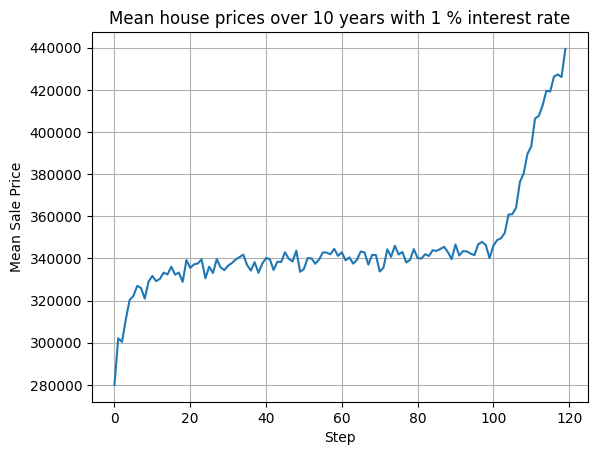

In [135]:
results2 = []

for _ in range(20):
    model2 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_1P_CONST[0])
    for i in range(10*12):
        #print("check", i)
        model2.step(interest_rate_step = INTEREST_RATE_1P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
        results2.append(model2.Mean_Sale_Prices)

#results2 = [model2.Mean_Sale_Prices, model2.Unsold_houses, model2.Number_of_buyers, model2.Number_of_houses_sold]
results2_mean = np.mean(results2, axis = 0)

plt.plot(results2_mean, label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

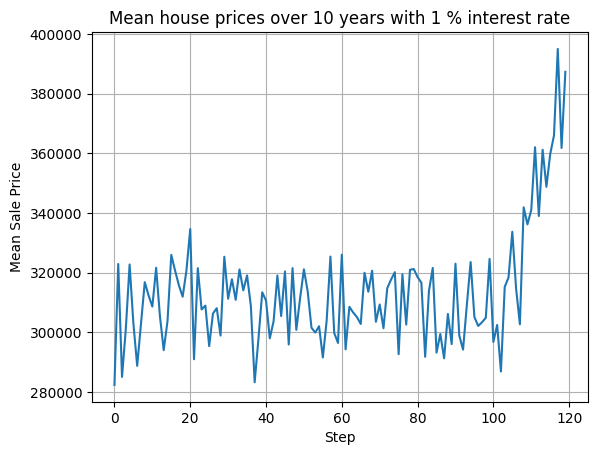

In [103]:
results3 = []

for _ in range(10):
    model3 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_2P_CONST[0])
    for i in range(10*12):
        #print("check", i)
        model3.step(interest_rate_step = INTEREST_RATE_2P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
        results3.append(model3.Mean_Sale_Prices)

results3_mean = np.mean(results3, axis = 0)

plt.plot(results3_mean, label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

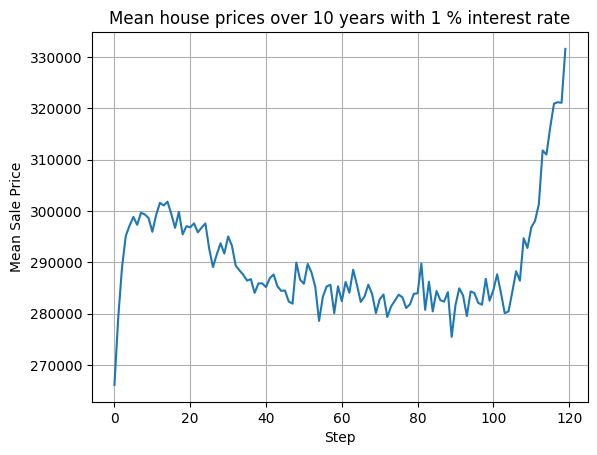

In [136]:
results4 = []

for _ in range(20):
    model4 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_3P_CONST[0])
    for i in range(10*12):
        #print("check", i)
        model4.step(interest_rate_step = INTEREST_RATE_3P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
        results4.append(model4.Mean_Sale_Prices)

results4_mean = np.mean(results4, axis = 0)

plt.plot(results4_mean, label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

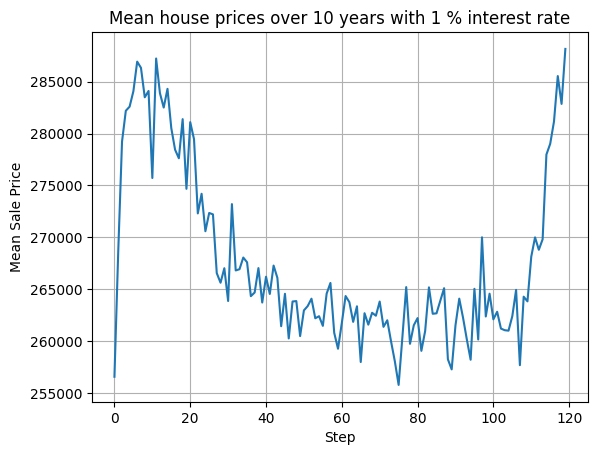

In [137]:
results5 = []

for _ in range(20):
    model5 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_4P_CONST[0])
    for i in range(10*12):
        #print("check", i)
        model5.step(interest_rate_step = INTEREST_RATE_4P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
        results5.append(model5.Mean_Sale_Prices)

results5_mean = np.mean(results5, axis = 0)

plt.plot(results5_mean, label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

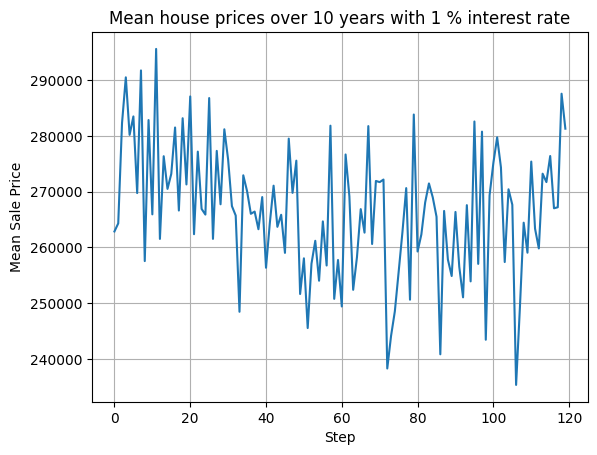

In [138]:
results6 = []

for _ in range(20):
    model6 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_5P_CONST[0])
    for i in range(10*12):
        #print("check", i)
        model6.step(interest_rate_step = INTEREST_RATE_5P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
        results6.append(model5.Mean_Sale_Prices)

results6_mean = np.mean(results6, axis = 0)

plt.plot(results6_mean, label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

Comparing results of different simulations

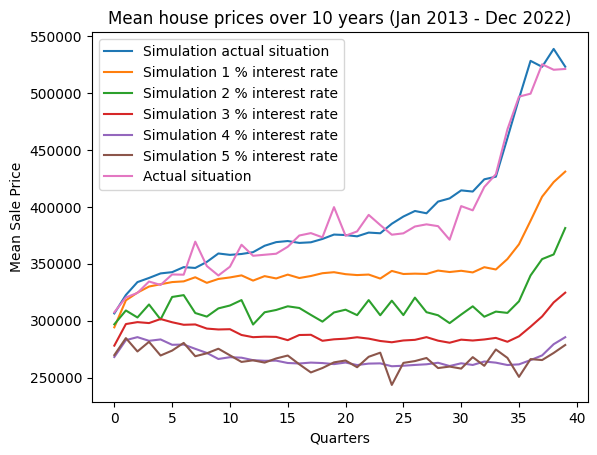

In [139]:
# change results per onth to results per querter to compare it with original data
results_per_qt1 = results_to_per_quarter(mean_prices_list)
results_per_qt2 = results_to_per_quarter(results2_mean)
results_per_qt3 = results_to_per_quarter(results3_mean)
results_per_qt4 = results_to_per_quarter(results4_mean)
results_per_qt5 = results_to_per_quarter(results5_mean)
results_per_qt6 = results_to_per_quarter(results6_mean)

plt.plot(results_per_qt1, label = 'Simulation actual situation')
plt.plot(results_per_qt2, label = 'Simulation 1 % interest rate')
plt.plot(results_per_qt3, label = 'Simulation 2 % interest rate')
plt.plot(results_per_qt4, label = 'Simulation 3 % interest rate')
plt.plot(results_per_qt5, label = 'Simulation 4 % interest rate')
plt.plot(results_per_qt6, label = 'Simulation 5 % interest rate')
plt.plot(controle2, label = 'Actual situation')
plt.title("Mean house prices over 10 years (Jan 2013 - Dec 2022)")
plt.xlabel('Quarters')
plt.ylabel('Mean Sale Price')
plt.legend()
plt.show()
plt.close()

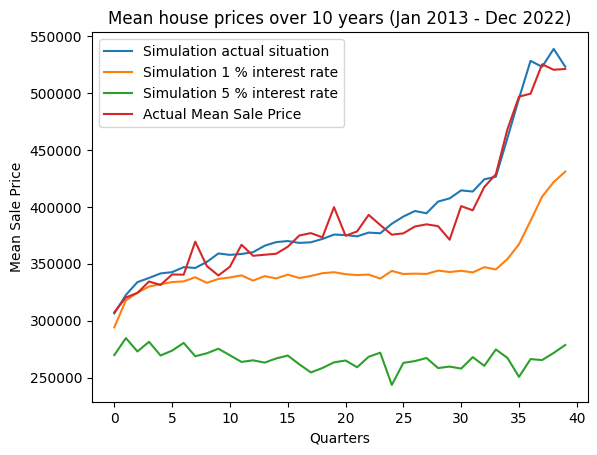

In [140]:
#more clear picture
plt.plot(results_per_qt1, label = 'Simulation actual situation')
plt.plot(results_per_qt2, label = 'Simulation 1 % interest rate')
plt.plot(results_per_qt6, label = 'Simulation 5 % interest rate')
plt.plot(controle2, label = 'Actual Mean Sale Price')
plt.title("Mean house prices over 10 years (Jan 2013 - Dec 2022)")
plt.xlabel('Quarters')
plt.ylabel('Mean Sale Price')
plt.legend()
plt.show()
plt.close()

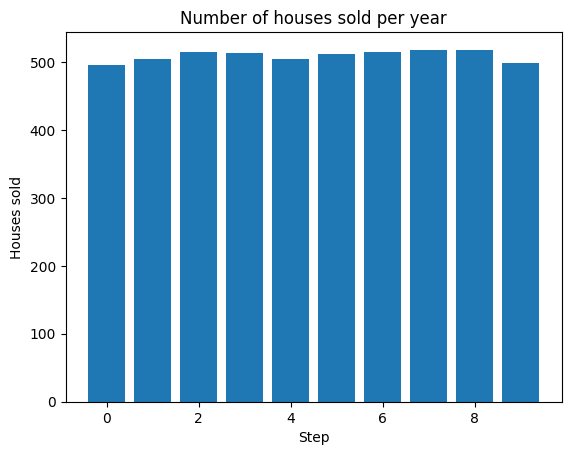

In [141]:
#bar plot for number of houses sold

house_sold_per_year = [0 for _ in range(10)]
for i in range(10):
    for j in range(12):
        house_sold_per_year[i] += results[3][(i + 1) * j] 

plt.bar([i for i in range(10)], house_sold_per_year)
plt.title("Number of houses sold per year")
plt.xlabel('Step')
plt.ylabel('Houses sold')
plt.show()
plt.close()

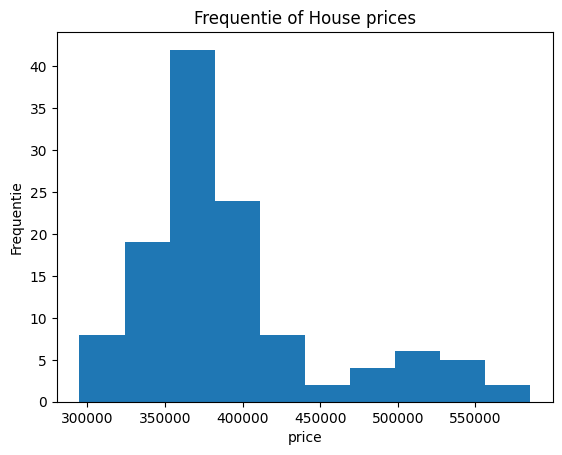

In [142]:
plt.hist(results[0])
plt.title("Frequentie of House prices")
plt.xlabel("price")
plt.ylabel("Frequentie")
plt.show()
plt.close()

In [154]:
len(model2.sales_this_month)

35

In [163]:
model2_2 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_1P_CONST[0])
for i in range(10*12):
    print("check", i)
    model2_2.step(interest_rate_step = INTEREST_RATE_1P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
model4_2 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_3P_CONST[0])
for i in range(10*12):
    print("check", i)
    model4_2.step(interest_rate_step = INTEREST_RATE_3P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)

model6_2 = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_5P_CONST[0])
for i in range(10*12):
    print("check", i)
    model6_2.step(interest_rate_step = INTEREST_RATE_5P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)

check 0
check 1
check 2
check 3
check 4
check 5
check 6
check 7
check 8
check 9
check 10
check 11
check 12
check 13
check 14
check 15
check 16
check 17
check 18
check 19
check 20
check 21
check 22
check 23
check 24
check 25
check 26
check 27
check 28
check 29
check 30
check 31
check 32
check 33
check 34
check 35
check 36
check 37
check 38
check 39
check 40
check 41
check 42
check 43
check 44
check 45
check 46
check 47
check 48
check 49
check 50
check 51
check 52
check 53
check 54
check 55
check 56
check 57
check 58
check 59
check 60
check 61
check 62
check 63
check 64
check 65
check 66
check 67
check 68
check 69
check 70
check 71
check 72
check 73
check 74
check 75
check 76
check 77
check 78
check 79
check 80
check 81
check 82
check 83
check 84
check 85
check 86
check 87
check 88
check 89
check 90
check 91
check 92
check 93
check 94
check 95
check 96
check 97
check 98
check 99
check 100
check 101
check 102
check 103
check 104
check 105
check 106
check 107
check 108
check 109
check 110


In [162]:
model2_2 = House_Model(number_of_buyers = 0, number_of_sellers = 1224, seed = None, interest_rate = INTEREST_RATE_1P_CONST[0])
for i in range(10*12):
    print("check", i)
    model2_2.step(interest_rate_step = INTEREST_RATE_1P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
model2_2.total_sales

check 0
check 1
check 2
check 3
check 4
check 5
check 6
check 7
check 8
check 9
check 10
check 11
check 12
check 13
check 14
check 15
check 16
check 17
check 18
check 19
check 20
check 21
check 22
check 23
check 24
check 25
check 26
check 27
check 28
check 29
check 30
check 31
check 32
check 33
check 34
check 35
check 36
check 37
check 38
check 39
check 40
check 41
check 42
check 43
check 44
check 45
check 46
check 47
check 48
check 49
check 50
check 51
check 52
check 53
check 54
check 55
check 56
check 57
check 58
check 59
check 60
check 61
check 62
check 63
check 64
check 65
check 66
check 67
check 68
check 69
check 70
check 71
check 72
check 73
check 74
check 75
check 76
check 77
check 78
check 79
check 80
check 81
check 82
check 83
check 84
check 85
check 86
check 87
check 88
check 89
check 90
check 91
check 92
check 93
check 94
check 95
check 96
check 97
check 98
check 99
check 100
check 101
check 102
check 103
check 104
check 105
check 106
check 107
check 108
check 109
check 110


[266391.61861974275,
 181659.12018310747,
 311533.73414027353,
 317651.0587000646,
 355410.2345312022,
 188342.92229249913,
 304102.312157394,
 303985.0347355974,
 278409.1154462043,
 295409.894587236,
 382910.81150591583,
 306012.52499271213,
 246818.0444798197,
 257631.63535854872,
 251613.04627581243,
 305961.9842711622,
 288342.03252665856,
 374106.1630030331,
 252162.12524409962,
 184586.84119253233,
 288438.31085167784,
 295632.74123368703,
 331022.14656970784,
 433701.47008034843,
 255111.6478980894,
 214566.24089824516,
 241733.2474677245,
 311568.755919892,
 302392.46636491205,
 331379.89464010106,
 308549.8374508041,
 309931.0840348763,
 322851.4293797064,
 454537.89425745944,
 255220.73491702406,
 358331.3397415062,
 304755.6687681555,
 384916.7311419739,
 354011.2283963061,
 235049.4828723294,
 279072.861902149,
 447714.8759316241,
 338113.17979131243,
 203956.39292769422,
 199839.44864101164,
 324013.26962753566,
 273975.80435569934,
 285529.490664774,
 193006.3161435038,


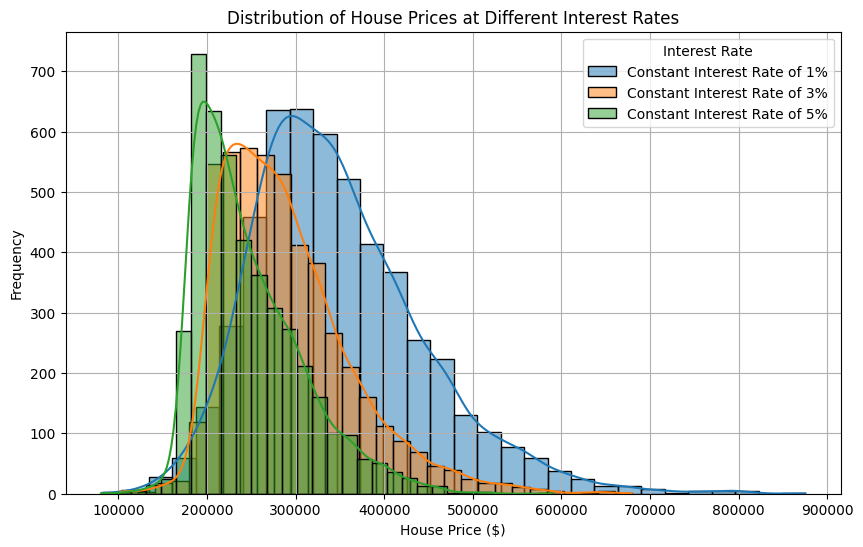

In [168]:
import seaborn as sns

plt.figure(figsize=(10, 6))
results_in_list = [model2_2.total_sales, model4_2.total_sales, model6_2.total_sales]
for i in range(3):
    sns.histplot(results_in_list[i], bins=30, kde=True, label=f"Constant Interest Rate of {i * 2 + 1}%")
#sns.histplot(results_per_qt1, bins=30, kde=True, label=f"Normal simulation")
plt.xlabel("House Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices at Different Interest Rates")
plt.legend(title="Interest Rate")
plt.grid(True)
plt.show()


In [144]:
INTEREST_RATE_10P_CONST = [10 for _ in range(120)]
results10p = []

for _ in range(20):
    model10p = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE_10P_CONST[0])
    for i in range(10*12):
        #print("check", i)
        model5.step(interest_rate_step = INTEREST_RATE_10P_CONST[i], inflation = INFLATON[i] / 12, p_new_buyers = 0.0116, base_growth = 0.011)
        results5.append(model10p.Mean_Sale_Prices)

results10p_mean = np.mean(results10p, axis = 0)

plt.plot(results10p_mean, label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

KeyboardInterrupt: 

In [ ]:
results_per_qt10 = results_to_per_quarter(results10p_mean)

plt.plot(results_per_qt1, label = 'Simulation actual situation')
plt.plot(results_per_qt2, label = 'Simulation 1 % interest rate')
plt.plot(results_per_qt3, label = 'Simulation 2 % interest rate')
plt.plot(results_per_qt4, label = 'Simulation 3 % interest rate')
plt.plot(results_per_qt5, label = 'Simulation 4 % interest rate')
plt.plot(results_per_qt6, label = 'Simulation 5 % interest rate')
plt.plot(results_per_qt10, label = 'Simulation 10 % interest rate')
plt.plot(controle2, label = 'Actual situation')
plt.title("Mean house prices over 10 years (Jan 2013 - Dec 2022)")
plt.xlabel('Quarters')
plt.ylabel('Mean Sale Price')
plt.legend()
plt.show()
plt.close()

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
results_in_list = [results_per_qt2, results_per_qt4, results_per_qt6]
for i in range(3):
    sns.histplot(results_in_list[i], bins=30, kde=True, label=f"Constant Interest Rate of {i * 2 + 1}%")
sns.histplot(results_per_qt10, bins=30, kde=True, label=f"Constant Interest Rate of 10 %")
plt.xlabel("House Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices at Different Interest Rates")
plt.legend(title="Interest Rate")
plt.grid(True)
plt.show()


Real data graphs are below

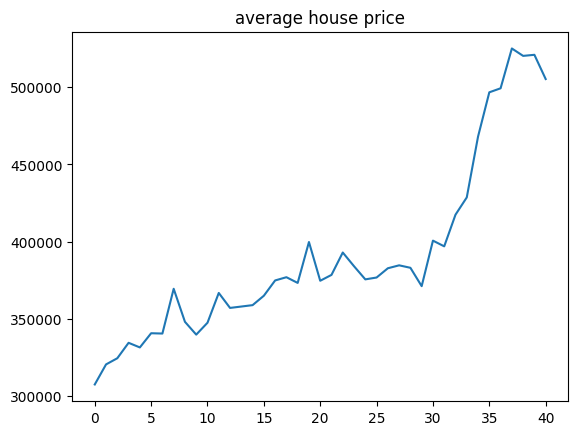

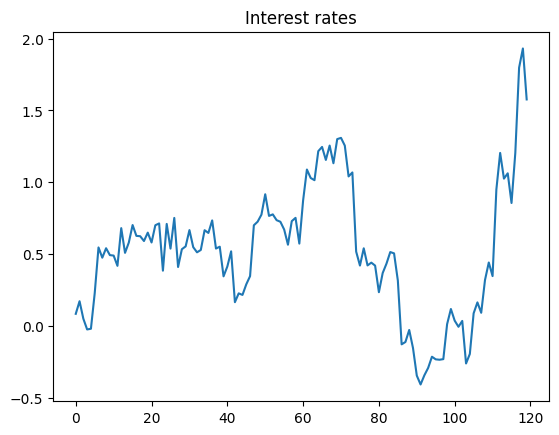

In [114]:
#check
controle = pd.read_csv("AVG_house_price.csv")
controle2 = controle["ASPUS"]
plt.plot(controle2)
plt.title("average house price")
plt.show()
plt.close()
plt.plot(df3)
plt.title("Interest rates")
plt.show()
plt.close()

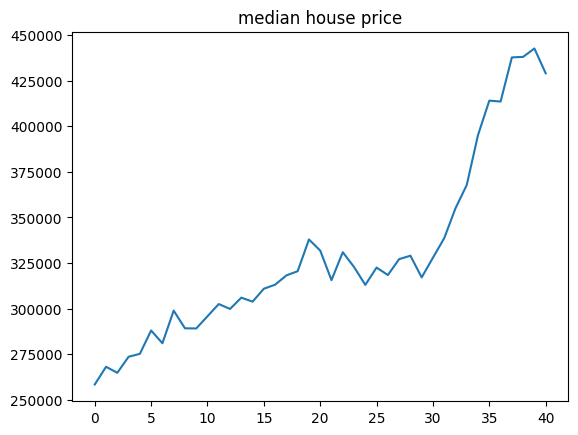

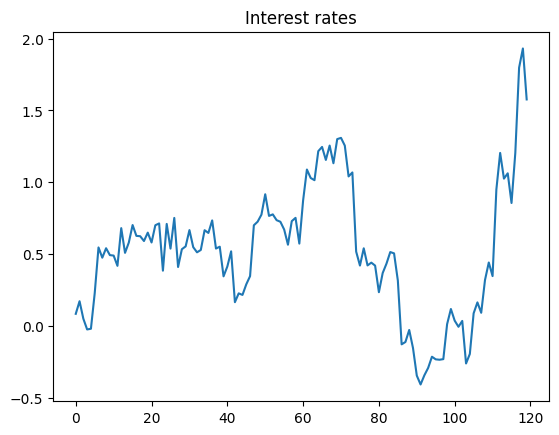

In [115]:
#check
controle = pd.read_csv("MSPUS.csv")
controle2 = controle["MSPUS"]
plt.plot(controle2)
plt.title("median house price")
plt.show()
plt.close()
plt.plot(df3)
plt.title("Interest rates")
plt.show()
plt.close()